### To load and test model with example image

Predicted terrain class: Forest


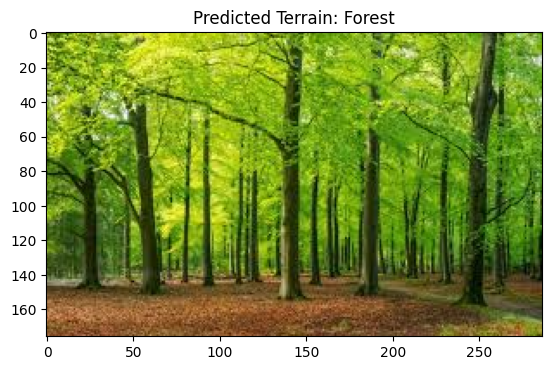

In [2]:
import torch
from torchvision import transforms
from PIL import Image
import torch.nn as nn
import matplotlib.pyplot as plt
from torchvision.models import efficientnet_b0, EfficientNet_B0_Weights

def load_terrain_classifier(model_path):

  # Pre-trained model with weights only for security
  model = efficientnet_b0(weights=None)

  # Modify the final classifier layer
  num_ftrs = model.classifier[1].in_features
  model.classifier[1] = nn.Linear(num_ftrs, 5)

  try:
      # Load weights only for improved security
      model.load_state_dict(torch.load(model_path, map_location='cpu', weights_only=True))
  except RuntimeError as e:
      raise RuntimeError(f"Error loading model: {e}") from e

  return model

# Define the classes
classes = ['Coast', 'Desert', 'Forest', 'Glacier', 'Mountain']

# Load the trained model
terrain_classifier = load_terrain_classifier(r'transfer_learning_models\efficientnet_terrain_classifier.pth') 
terrain_classifier.eval()  # Set the model to evaluation mode

# Define the preprocessing transformations
preprocess = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to the input size of the model
    transforms.ToTensor(),           # Convert the image to a tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize
])

# Load and preprocess the image
def predict_image(image_path):
    image = Image.open(image_path)
    image_tensor = preprocess(image)
    image_tensor = image_tensor.unsqueeze(0)  # Add batch dimension

    with torch.no_grad():
        output = terrain_classifier(image_tensor)
        _, predicted = torch.max(output, 1)

    return predicted.item()

# Predict the terrain class
image_path = r"C:\Users\agraw\Downloads\images.jpeg" # put img path here
predicted_class = predict_image(image_path)
print(f"Predicted terrain class: {classes[predicted_class]}")

# Visualize the image and prediction
image = Image.open(image_path)
plt.imshow(image)
plt.title(f"Predicted Terrain: {classes[predicted_class]}")
plt.show()